# Exercicios de Interpolação
## Nabson Paiva Souza da Silva

### Funções necessárias

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def resolvePoli(c,x):
    return np.array(([x**i*c[len(c)-1-i] for i in range(len(c))])).sum(axis=0)

In [36]:
def escolheIntervalo(x,y,xalvo,n):
    d = np.abs(xalvo - x)
    vx = np.copy(x)
    vy = np.copy(y)
    for i in range(len(x)-n):
        m = np.argmax(d)
        vx = np.delete(vx,m)
        vy = np.delete(vy,m)
        d = np.delete(d,m)
    return vx,vy

In [37]:
def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def eliminacaoGaussianaSimples(A0,b):
    M = np.zeros(A0.shape)
    A = np.concatenate((A0,b.reshape(len(b),1)),axis=1)
    for i in range(len(A)-1):
        A[i+1:] -= (A[i+1:,i]/A[i][i]).reshape((len(M[i+1:]),1))*A[i]
    return resolveTS(A[:,:len(b)],A[:,len(b)])

In [188]:
def interpoli(x,y):
    t = len(x)
    A = np.zeros((t,t))
    A[:,t-1] = 1
    A[:,t-2] = x
    for i in range(t-2):
        A[:,i] = x**(t-i-1)
    return eliminacaoGaussianaSimples(A,y)

In [61]:
def lagranged(x,y,xalvo):
    t = len(x)
    yalvo = 0
    for i in range(t):
        n = d = 1
        for j in range(t):
            if i != j:
                n *= (xalvo-x[j])
                d *= (x[i]-x[j])
        yalvo += y[i]*(n/d)
    return yalvo

### Exercicio 1 ###

Nos dados abaixo está o número de habitantes de manaus entre 1950 e 2000, como em sala de aula

Compute:
    - Com 3 pontos o número de habitantes de Manaus em 1958 e 1988.
    - Com 4 pontos o número de habitantes em 1958 e 1988.
    
Qual foi a diferença entre os dois resultados?

In [1]:
ano = np.array([1950,1960,1970,1980,1991,2000])
populacao = np.array([139620,173706,311622,633392,1011500,1403796])

In [49]:
print("-> Número de habitantes de 1958:")
x, y = escolheIntervalo(ano,populacao,1958,3)
p0 = round(resolvePoli(interpoli(x,y),1958))
print("\tCom 3 pontos:",p0)
x, y = escolheIntervalo(ano,populacao,1958,4)
p = round(resolvePoli(interpoli(x,y),1958))
print("\tCom 4 pontos:",p)
print("\t- Diferença:",p-p0)

print("-> Número de habitantes de 1958:")
x, y = escolheIntervalo(ano,populacao,1988,3)
p0 = round(resolvePoli(interpoli(x,y),1988))
print("\tCom 3 pontos:",p0)
x, y = escolheIntervalo(ano,populacao,1988,4)
p = round(resolvePoli(interpoli(x,y),1988))
print("\tCom 4 pontos:",p)
print("\t- Diferença:",p-p0)

-> Número de habitantes de 1958:
	Com 3 pontos: 158582.0
	Com 4 pontos: 114566982104.0
	- Diferença: 114566823522.0
-> Número de habitantes de 1958:
	Com 3 pontos: 897322.0
	Com 4 pontos: 101979579504.0
	- Diferença: 101978682182.0


### Exercicio 2

Dada a função $f(x)=10x^{4}+2x+1$, determine a interpolação de dois pontos $P_2(0.15)$ e $P_2(0.25)$ usando para interpolar os pontos f(0,1), f(0,2) e f(0.3).

- Pelo método de interpolação polinomial
- Pelo Polinômio de Lagrange


In [50]:
def f(x):
    return 10*x**4 + 2*x + 1

x = np.array([0.1,0.2,0.3])
y = f(x)

In [143]:
print("-> Interpolação Polinomial")
x1, y1 = escolheIntervalo(x,y,0.15,3)
pi1 = resolvePoli(interpoli(x1,y1),0.15)
print("\tf(0.15) =",pi1)

x2, y2 = escolheIntervalo(x,y,0.25,3)
pi2 = resolvePoli(interpoli(x2,y2),0.25)
print("\tf(0.25) =",pi2)


print("\n-> Interpolação por Lagrange")
l1 = lagranged(x1,y1,0.15)
print("\tf(0.15) =",l1)

l2 = lagranged(x2,y2,0.25)
print("\tf(0.25) =",l2)

-> Interpolação Polinomial
	f(0.15) = 1.4494995035061888
	f(0.25) = 1.7473428985134454

-> Interpolação por Lagrange
	f(0.15) = 1.449499503506189
	f(0.25) = 1.7473428985134447


Qual o erro absoluto e relativo de cada método? Quanto tempo cada um leva para calcular os dois pontos?

In [144]:
f1 = f(0.15)
f2 = f(0.25)

print("-> Erros para Interpolação Polinomial")
print("\tf(0.15):")
a = np.abs(f1-pi1)
print("\t\tAbsoluto =",a)
print("\t\tRelativo =",a/f1)
print("\t\tTempo:",end=" ")
%timeit -n1 resolvePoli(interpoli(x1,y1),0.15)
print("\tf(0.25):")
a = np.abs(f2-pi2)
print("\t\tAbsoluto =",a)
print("\t\tRelativo =",a/f1)
print("\t\tTempo:",end=" ")
%timeit -n1 resolvePoli(interpoli(x2,y2),0.25)

print("\n-> Erros para Polinômio de Lagranje")
print("\tf(0.15):")
a = np.abs(f1-l1)
print("\t\tAbsoluto =",a)
print("\t\tRelativo =",a/f1)
print("\t\tTempo:",end=" ")
%timeit -n1 lagranged(x1,y1,0.15)
print("\tf(0.25):")
a = np.abs(f2-l2)
print("\t\tAbsoluto =",a)
print("\t\tRelativo =",a/f1)
print("\t\tTempo:",end=" ")
%timeit -n1 lagranged(x2,y2,0.25)

-> Erros para Interpolação Polinomial
	f(0.15):
		Absoluto = 6.137103258962995e-05
		Relativo = 4.2341257080696954e-05
		Tempo: 133 µs ± 53.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
	f(0.25):
		Absoluto = 6.106074107758985e-05
		Relativo = 4.212717998068955e-05
		Tempo: 129 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

-> Erros para Polinômio de Lagranje
	f(0.15):
		Absoluto = 6.137103258985199e-05
		Relativo = 4.2341257080850145e-05
		Tempo: 24.7 µs ± 6.06 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
	f(0.25):
		Absoluto = 6.106074107825599e-05
		Relativo = 4.212717998114913e-05
		Tempo: 24.4 µs ± 4.79 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercicio 3

Dada a função $f(x)=sen(x)+2x+1$, determine $L_2(0,15)$ e $L_3(0,15)$ usando os valores $f(0,1),f(0,2),f(0,3)$ e $f(0,4)$, usando o polinomio de lagrange.

Plote a função no intervalo [0,0.5] e os pontos computados

In [194]:
def f(x):
    return np.sin(x) + 2*x + 1

x = np.array([0.1,0.2,0.3,0.4])
y = f(x)

In [221]:
x3, y3 = escolheIntervalo(x,y,0.15,3)
print("-> Polinômio de Lagrange com grau 2:")
l_2 = lagranged(x3,y3,0.15)
print("\tL2(0.15) =",l_2)

x3, y3 = escolheIntervalo(x,y,0.25,4)
print("\n-> Polinômio de Lagrange com grau 3:")
l_3 = lagranged(x3,y3,0.25)
print("\tL3(0.15) =",l_3)

-> Polinômio de Lagrange com grau 2:
	L2(0.15) = 1.449499503506189

-> Polinômio de Lagrange com grau 3:
	L3(0.15) = 1.7474033798845081


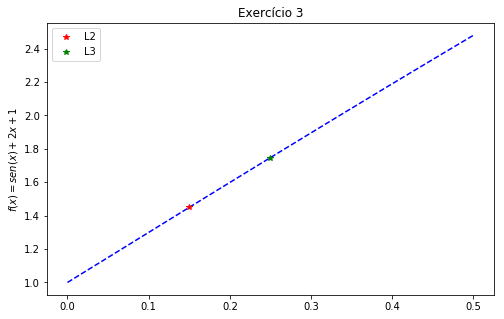

In [226]:
xplot = np.linspace(0,0.5,1000)
yplot = f(xplot)
plt.figure(figsize=(8,5))
plt.plot(xplot,yplot,'b--')
plt.plot(0.15,l_2,'r*',label="L2")
plt.plot(0.25,l_3,'g*',label="L3")
plt.legend(loc='upper left')
plt.ylabel("$f(x)=sen(x)+2x+1$")
plt.title("Exercício 3")
plt.show()

### Exercício 4 ###

1 - Na célula abaixo, são dados os números de óbitos em hospitais em Manaus. Como pode ser visto, os dados referentes à 2008 e a 2011 estão faltando. Use a interpolação polinomial com 2,3 e 5 pontos para estimar estes pontos.

2 - Plote as curvas dos polinômios gerados (em dois gráficos), de forma similar ao feito no notebook em sala de aula

-> Óbitos em 2008:
	P1(2008) = 3019.0
	P2(2008) = 2984.0
	P4(2008) = 135291584193.0

-> Óbitos em 2011:
	P1(2011) = 3656.0
	P2(2011) = 3386.0
	P4(2011) = -391713531138.0


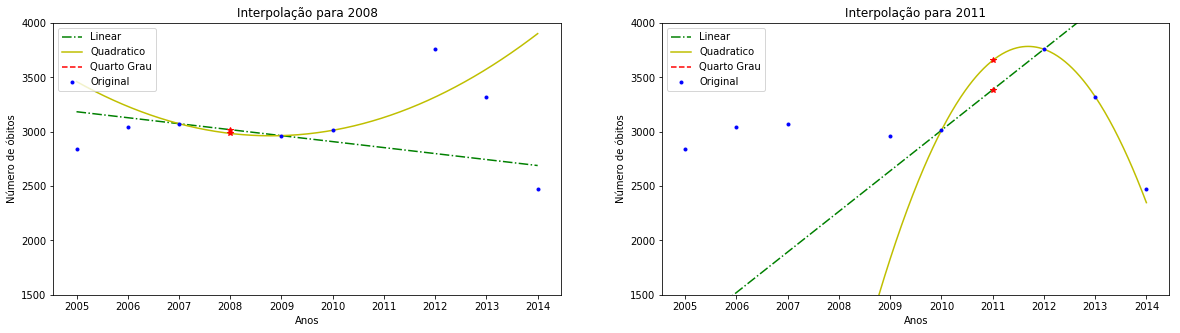

In [209]:
xmorte = np.array([2005,2006,2007,2009,2010,2012,2013,2014])
ymorte = np.array([2838,3044,3074,2964,3013,3759,3323,2471])

x08_1,y08_1 = escolheIntervalo(xmorte,ymorte,2008,2)
x08_2,y08_2 = escolheIntervalo(xmorte,ymorte,2008,3)
x08_4,y08_4 = escolheIntervalo(xmorte,ymorte,2008,5)

x11_1,y11_1 = escolheIntervalo(xmorte,ymorte,2011,2)
x11_2,y11_2 = escolheIntervalo(xmorte,ymorte,2011,3)
x11_4,y11_4 = escolheIntervalo(xmorte,ymorte,2011,5)

c08_1 = interpoli(x08_1,y08_1)
c08_2 = interpoli(x08_2,y08_2)
c08_4 = interpoli(x08_4,y08_4)

c11_1 = interpoli(x11_1,y11_1)
c11_2 = interpoli(x11_2,y11_2)
c11_4 = interpoli(x11_4,y11_4)

xplot = np.linspace(2005,2014,500)

yp08_1 = resolvePoli(c08_1,xplot)
yp08_2 = resolvePoli(c08_2,xplot)
yp08_4 = resolvePoli(c08_4,xplot)

yp11_1 = resolvePoli(c11_1,xplot)
yp11_2 = resolvePoli(c11_2,xplot)
yp11_4 = resolvePoli(c11_4,xplot)

plt.figure(1,figsize=(20,5))
plt.subplot(121)             
# plt.figure(figsize=(8,5))
plt.plot(xplot,yp08_1,'g-.',label='Linear')
plt.plot(xplot,yp08_2,'y-',label='Quadratico')
plt.plot(xplot,yp08_4,'r--',label='Quarto Grau')
plt.plot(xmorte,ymorte,'b.',label='Original')
plt.xlabel("Anos")
plt.ylabel("Número de óbitos")
print("-> Óbitos em 2008:")
a = resolvePoli(c08_1,2008)
print("\tP1(2008) =",round(a))
plt.plot(2008,a,'r*')
a = resolvePoli(c08_2,2008)
print("\tP2(2008) =",round(a))
plt.plot(2008,a,'r*')
a = resolvePoli(c08_4,2008)
print("\tP4(2008) =",round(a))
plt.plot(2008,a,'r*')
plt.ylim(1500,4000)
plt.xticks([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.legend(loc='upper left')
plt.title("Interpolação para 2008")

# plt.figure(figsize=(8,5))
plt.subplot(122)      
plt.title("Interpolação para 2011")
plt.plot(xplot,yp11_1,'g-.',label='Linear')
plt.plot(xplot,yp11_2,'y-',label='Quadratico')
plt.plot(xplot,yp11_4,'r--',label='Quarto Grau')
plt.plot(xmorte,ymorte,'b.',label='Original')
plt.xlabel("Anos")
plt.ylabel("Número de óbitos")
print("\n-> Óbitos em 2011:")
a = resolvePoli(c11_2,2011)
print("\tP1(2011) =",round(a))
plt.plot(2011,a,'r*')
a = resolvePoli(c11_1,2011)
print("\tP2(2011) =",round(a))
plt.plot(2011,a,'r*')
a = resolvePoli(c11_4,2011)
print("\tP4(2011) =",round(a))
plt.plot(2011,a,'r*')
plt.ylim(1500,4000)
plt.xticks([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.legend(loc='upper left')
plt.show()